In [1]:
from transformers import pipeline
from datasets import load_dataset
pipe = pipeline("text-to-speech", model="suno/bark-small")

/home/hoang/anaconda3/envs/dingi/lib/python3.12/site-packages/transformers/models/encodec/modeling_encodec.py:124: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.register_buffer("padding_total", torch.tensor(kernel_size - stride, dtype=torch.int64), persistent=False)
Device set to use cuda:0


In [2]:
text = "Ladybugs have had important roles in culture and religion, being associated with luck, love, fertility and prophecy. "
output = pipe(text)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:10000 for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


In [3]:
from IPython.display import Audio

Audio(output["audio"], rate=output["sampling_rate"], autoplay=False)

In [4]:
fr_text = "Wie geht es dir? Es tut mir leid. Lange nicht gesehen"
output = pipe(fr_text)
Audio(output["audio"], rate=output["sampling_rate"])

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:10000 for open-end generation.


In [6]:
song = "♪ In the jungle, the mighty jungle, the ladybug was seen. ♪ "
output = pipe(song)
Audio(output["audio"], rate=output["sampling_rate"])

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:10000 for open-end generation.


In [7]:
## Load dataset in streaming mode
voxpopuli_de= load_dataset("facebook/voxpopuli", "de", streaming=True)

In [8]:
voxpopuli_de["train"]

IterableDataset({
    features: ['audio_id', 'language', 'audio', 'raw_text', 'normalized_text', 'gender', 'speaker_id', 'is_gold_transcript', 'accent'],
    num_shards: 1
})

In [9]:
## get the 3rd sample
training_head = voxpopuli_de["train"].take(5)
list_ds = list(training_head)
print(list_ds[2])

{'audio_id': '20150908-0900-PLENARY-3-de_20150908-09:01:12_26', 'language': 1, 'audio': {'path': 'train_part_0/20150908-0900-PLENARY-3-de_20150908-09:01:12_26.wav', 'array': array([-0.01617432, -0.05258179, -0.06607056, ...,  0.00396729,
       -0.00219727, -0.00396729]), 'sampling_rate': 16000}, 'raw_text': 'Denn es gibt biologische Grenzen beim Tier.', 'normalized_text': 'denn es gibt biologische grenzen beim tier.', 'gender': 'female', 'speaker_id': '4282', 'is_gold_transcript': True, 'accent': 'None'}


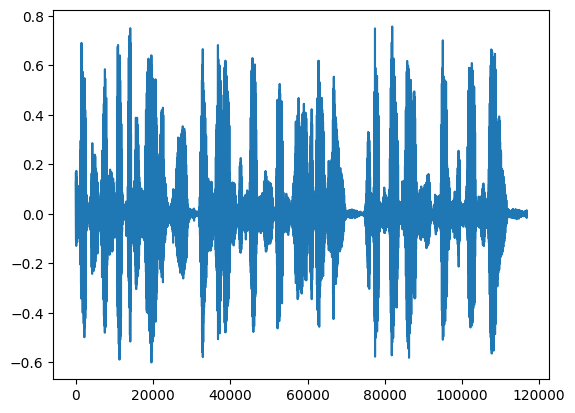

In [19]:
import matplotlib.pyplot as plt
example = list_ds[4]
plt.plot(example['audio']['array'])
Audio(example['audio']['array'], rate=list_ds[2]['audio']["sampling_rate"], autoplay=False)

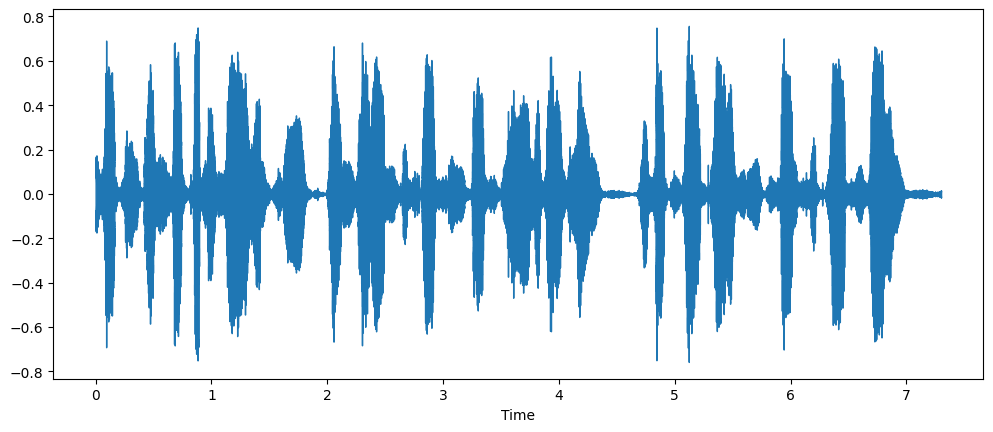

In [20]:
# Waveform 

import librosa
import matplotlib.pyplot as plt
import librosa.display

array = example["audio"]["array"]
sampling_rate = example["audio"]["sampling_rate"]
plt.figure().set_figwidth(12)
librosa.display.waveshow(array, sr=sampling_rate)

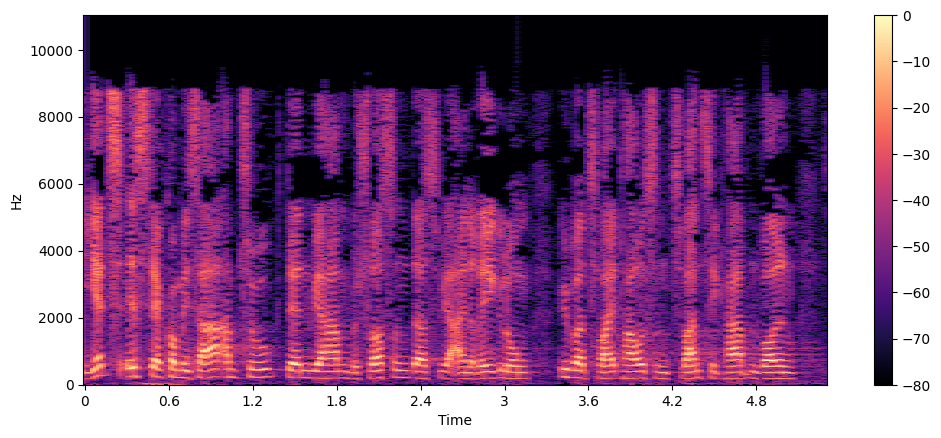

In [21]:
# Spectrogram

import numpy as np

D = librosa.stft(array)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

plt.figure().set_figwidth(12)
librosa.display.specshow(S_db, x_axis="time", y_axis="hz")
plt.colorbar()

In [22]:
print(S_db.shape[0]*S_db.shape[1])
print(array.shape)

234725
(116800,)


In [23]:
from transformers import pipeline

asr = pipeline("automatic-speech-recognition", model="facebook/wav2vec2-large-xlsr-53-german")

Device set to use cuda:0


In [24]:
# Compare the results
print(asr(example["audio"]["array"]))
print(example["raw_text"])

{'text': 'jetzt ist der kommissar am zug denn wir haben beschlossen dass wir eine regelung über zwanzig haben wollen'}
Jetzt ist der Kommissar am Zug, denn wir haben beschlossen, dass wir eine Regelung über 2020 hinaus haben wollen.


In [43]:
# Once again, listen to compare. Even though the output doesn't match exactly the provided transcription, the model actually does really well.
# You don't really hear the "Denn es gibt bio" part in the Audio.

from IPython.display import Audio

Audio(example["audio"]["array"], rate=16000)